<a href="https://colab.research.google.com/github/zahrafl/data_mining/blob/main/machineLearning2/prediksi_harga_rumah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list


ref                                                               title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
rakeshkapilavai/extrovert-vs-introvert-behavior-data              Extrovert vs. Introvert Behavior Data                    15392  2025-05-21 04:26:52.443000           4704        106  1.0              
adilshamim8/social-media-addiction-vs-relationships               Students' Social Media Addiction                          7851  2025-05-10 14:38:02.713000          10469        153  1.0              
atomicd/retail-store-inventory-and-demand-forecasting             Retail Store Inventory and Demand Forecasting          1424032  2025-05-21 10:51:54.783000           2049         30  1.0     

In [ ]:
!kaggle datasets download -d 'wisnuanggara/daftar-harga-rumah'

Dataset URL: https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/109k [00:00<?, ?B/s]
100% 109k/109k [00:00<00:00, 220MB/s]


In [ ]:
import zipfile

In [ ]:
dataset_zip = zipfile.ZipFile('daftar-harga-rumah.zip', 'r')

In [ ]:
dataset_zip.extractall()

In [ ]:
dataset_zip.close()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import pandas as pd
df = pd.read_excel('DATA RUMAH.xlsx')
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [ ]:
df.info()
print("Shape of data:")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB
Shape of data:
(1010, 8)


In [ ]:
print("Jumlah data duplicated:", df.duplicated().sum(), end="")
df.isna().sum()

Jumlah data duplicated: 0

,0
NO,0
NAMA RUMAH,0
HARGA,0
LB,0
LT,0
KT,0
KM,0
GRS,0


In [ ]:
df = df.rename(columns={
    'NO': 'nomor',
    'NAMA RUMAH': 'nama_rumah',
    'HARGA': 'harga',
    'LB': 'luas_rumah',
    'LT': 'luas_tanah',
    'KT': 'kamar_tidur',
    'KM': 'kamar_mandi',
    'GRS': 'garasi'
})
df

,nomor,nama_rumah,harga,luas_rumah,luas_tanah,kamar_tidur,kamar_mandi,garasi
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


In [ ]:
df['harga'] = (df['harga']/1000000).astype(int)
df.drop(columns=['nomor'], inplace=True)
df.head()

,nama_rumah,harga,luas_rumah,luas_tanah,kamar_tidur,kamar_mandi,garasi
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000,400,355,6,5,3


In [ ]:
q1 = df['harga'].quantile(0.25)
median = df['harga'].median()
q3 = df['harga'].quantile(0.75)

def classification_harga(harga):
  if harga <= q1:
    return 'Murah'
  elif harga <= median:
    return 'Sedang'
  else:
    return 'Mahal'

df['tingkat_harga'] = df['harga'].apply(classification_harga)
df.head()

,nama_rumah,harga,luas_rumah,luas_tanah,kamar_tidur,kamar_mandi,garasi,tingkat_harga
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800,220,220,3,3,0,Sedang
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600,180,137,4,3,2,Sedang
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000,267,250,4,4,4,Murah
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430,40,25,2,2,0,Murah
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000,400,355,6,5,3,Mahal


In [ ]:
df.describe()

,harga,luas_rumah,luas_tanah,kamar_tidur,kamar_mandi,garasi
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7628.982178,276.539604,237.432673,4.668317,3.607921,1.920792
std,7340.945285,177.864557,179.957604,1.572776,1.420066,1.510998
min,430.000000,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3262.500000,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5000.000000,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9000.000000,350.000000,290.000000,5.000000,4.000000,2.000000
max,65000.000000,1126.000000,1400.000000,10.000000,10.000000,10.000000


TAHAP EKSPLORASI DATA


Text(0.5, 1.0, 'Distribusi Jumlah Grasi')

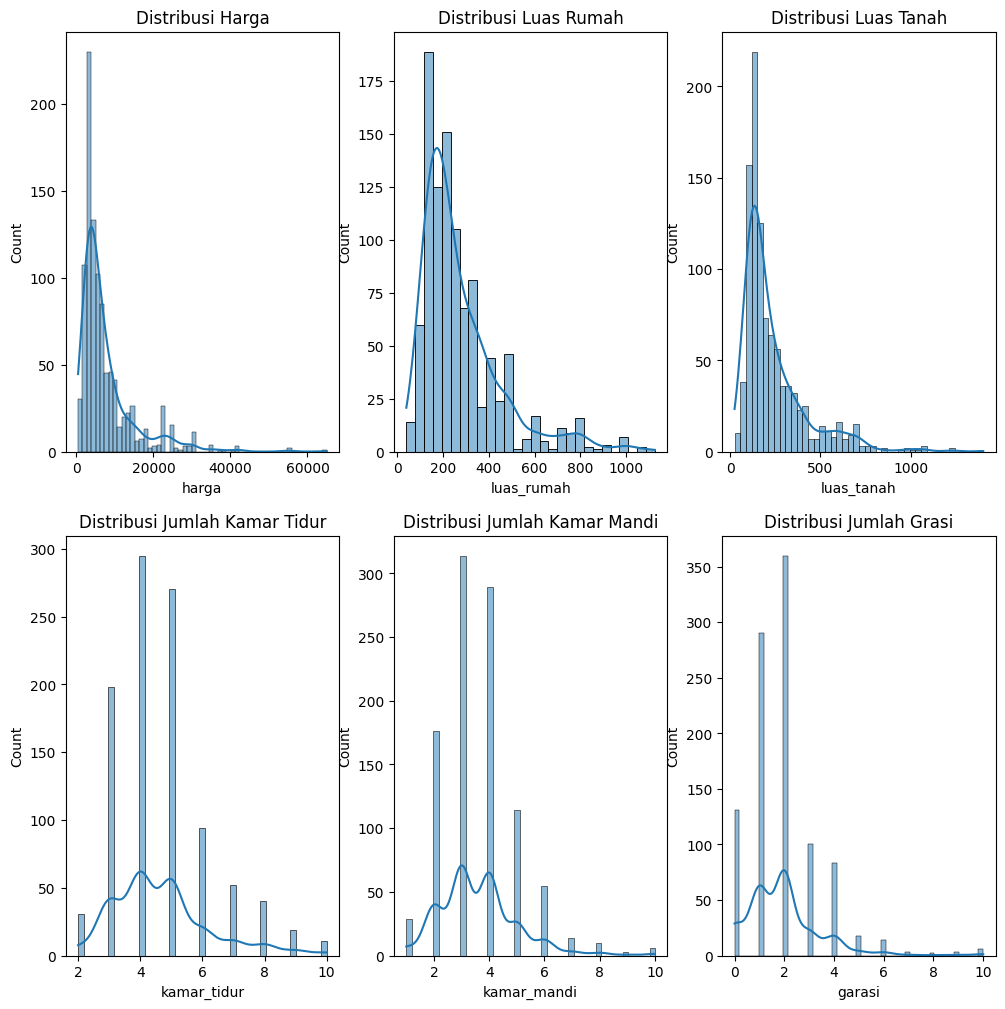

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 3, 1)
sns.histplot(df['harga'], kde=True)
plt .title('Distribusi Harga')

plt.subplot(2, 3, 2)
sns.histplot(df['luas_rumah'], kde=True)
plt.title('Distribusi Luas Rumah')


plt.subplot(2, 3, 3)
sns.histplot(df['luas_tanah'], kde=True)
plt.title('Distribusi Luas Tanah')

plt.subplot(2, 3, 4)
sns.histplot(df['kamar_tidur'], kde=True)
plt.title('Distribusi Jumlah Kamar Tidur')

plt.subplot(2, 3, 5)
sns.histplot(df['kamar_mandi'], kde=True)
plt.title('Distribusi Jumlah Kamar Mandi')

plt.subplot(2, 3, 6)
sns.histplot(df['garasi'], kde=True)
plt.title('Distribusi Jumlah Grasi')

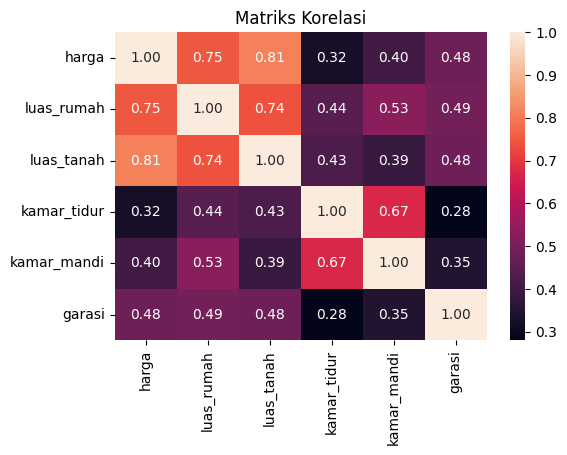

In [ ]:
# Menghapus kolom 'tingkat_harga' dan 'nama_rumah'
df_corr = df.drop(['tingkat_harga', 'nama_rumah'], axis=1)

# Menghitung matriks korelasi
correlation_all = df_corr.corr()

# Menampilkan matriks korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_all, annot=True, cmap='rocket', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

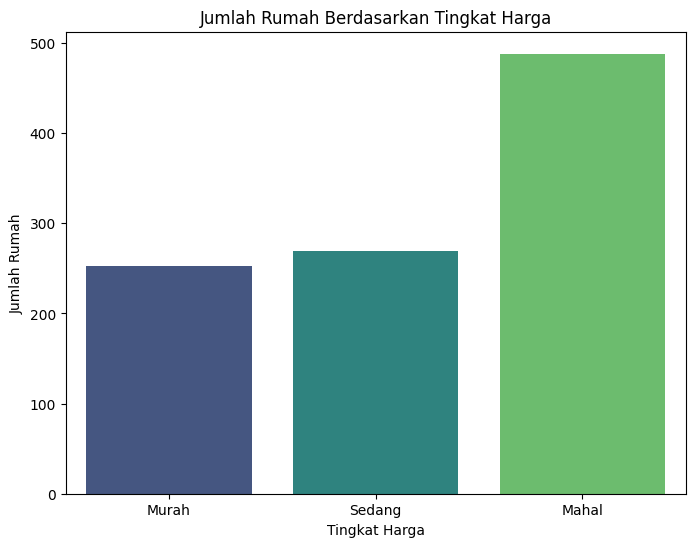

,count
tingkat_harga,
Mahal,488
Sedang,269
Murah,253


In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='tingkat_harga', order=['Murah', 'Sedang', 'Mahal'], palette='viridis')
plt.title('Jumlah Rumah Berdasarkan Tingkat Harga')
plt.xlabel('Tingkat Harga')
plt.ylabel('Jumlah Rumah')
plt.show()

df['tingkat_harga'].value_counts()

TAHAP PEMBAGIAN DATASET MENJADI TRAINING SET DAN TESTING TEST



In [ ]:
X = df[['luas_rumah', 'luas_tanah', 'kamar_tidur', 'kamar_mandi', 'garasi']].values
y = df['harga'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

TAHAP PEMODELAN ALGORITMA LINEAR REGRESSION


In [ ]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Menghitung MSE dan R-squared untuk data pelatihan
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Menghitung MSE dan R-squared untuk data pengujian
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model pada data pelatihan:")
print(f'MSE: {mse_train}')
print(f'R-squared: {r2_train}')

print("\nEvaluasi Model pada data pengujian:")
print(f'MSE: {mse_test}')
print(f'R-squared: {r2_test}')

Evaluasi Model pada data pelatihan:
MSE: 16455644.894573443
R-squared: 0.7040692928048742

Evaluasi Model pada data pengujian:
MSE: 10675731.022166723
R-squared: 0.7713132526788451


VISUALISASI REGERESI DATA LATIH DAN DATA UJI


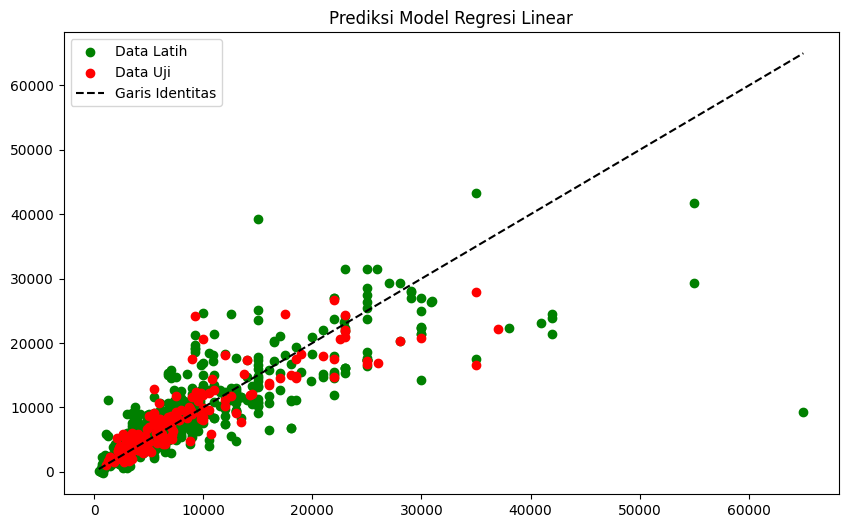

In [ ]:
# Visualisasi regresi data latih dan data uji
plt.figure(figsize=(10,6))

# Plot data latih
plt.scatter(y_train, y_train_pred, color='green', label='Data Latih')

# Plot data uji
plt.scatter(y_test, y_pred, color='red', label='Data Uji')

# Plot garis identitas
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='black', label='Garis Identitas')

# Judul plot
plt.title('Prediksi Model Regresi Linear')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Mendefinisikan fungsi untuk prediksi harga berdasarkan fitur yang dipilih
def predict_house_price(luas_rumah, luas_tanah, kamar_tidur, kamar_mandi, garasi):
   # Melakukan prediksi harga menggunakan model regresi linear
   predicted_price = model.predict([[luas_rumah, luas_tanah, kamar_tidur, kamar_mandi, garasi]])

   # Menampilkan hasil prediksi
   print("Harga rumah diperkirakan sekitar IDR {:,.3f} juta".format(predicted_price[0]))

# Membuat slider untuk setiap fitur
slider_luas_rumah = widgets.FloatSlider(value=100, min=df['luas_rumah'].min(), max=df['luas_rumah'].max(), step=1, description='Luas Rumah:')
slider_luas_tanah = widgets.FloatSlider(value=300, min=20, max=df['luas_tanah'].max(), step=1, description='Luas Tanah:')
slider_kamar_tidur = widgets.FloatSlider(value=3, min=1, max=df['kamar_tidur'].max(), step=1, description='Kamar Tidur:')
slider_kamar_mandi = widgets.FloatSlider(value=2, min=1, max=df['kamar_mandi'].max(), step=1, description='Kamar Mandi:')
slider_garasi = widgets.FloatSlider(value=2, min=0, max=df['garasi'].max(), step=1, description='Garasi:')

# Membuat tampilan
widgets.interactive(predict_house_price, luas_rumah=slider_luas_rumah, luas_tanah=slider_luas_tanah,  kamar_tidur=slider_kamar_tidur, kamar_mandi=slider_kamar_mandi, garasi=slider_garasi)


interactive(children=(FloatSlider(value=100.0, description='Luas Rumah:', max=1126.0, min=40.0, step=1.0), Flo…

untuk melakukan prediksi bisa menggunakan slider diatas, hal ini bertujuan untuk mengetahui harga rumah dengan ukuran tertentu, contohnya
1. Mempunyai luas rumah dengan ukuran 87m^2, luas tanah dengan ukuran 107m^2, jumlah kamar tidur sebanyak 2 ruangan, kamar mandi 2 ruangan, serta garasi sebanyak 2 ruangan, memiliki kisaran harga RP 2,475.522 juta
